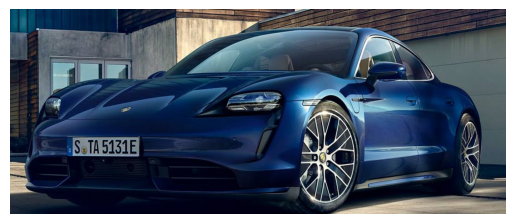

<Figure size 6750x5250 with 0 Axes>

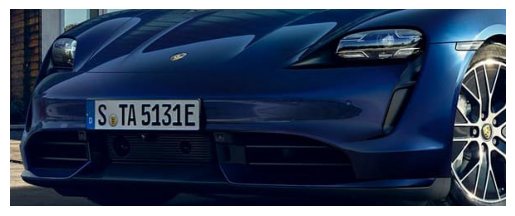

<Figure size 6750x5250 with 0 Axes>

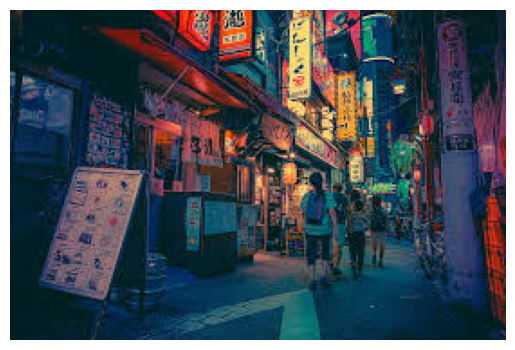

<Figure size 6750x5250 with 0 Axes>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.figure(figsize=(45, 35), dpi=150)
    plt.show()

def read(path: str):
    return cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

img1 = read(r'C:\CV\Chorniy_Sviatoslav_CV_lab2\porsche.jpg')
show(img1)

img2 = read(r'C:\CV\Chorniy_Sviatoslav_CV_lab2\porscheX.jpg')
show(img2)

img3 = read(r'C:\CV\Chorniy_Sviatoslav_CV_lab2\pani.jpg')
show(img3)

In [2]:
def affine(img):
    img = cv.warpAffine(img, np.array([[1, -0.3, 0], [0, 1, 0]]), img1.shape[:2][::-1])
    return img

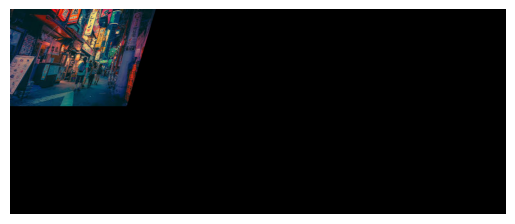

<Figure size 6750x5250 with 0 Axes>

In [3]:
img4 = affine(img3)
show(img4)

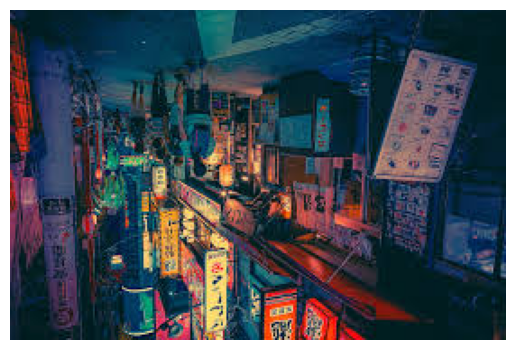

<Figure size 6750x5250 with 0 Axes>

In [4]:
rot_1 = cv.rotate(img3, cv.ROTATE_180)
show(rot_1)

In [5]:
def dist(x, y):
  n = len(x)
  assert len(x) == len(y)
  return float(sum([(x[i] ^ y[i]) for i in range(n)]))

In [6]:
def custom_match(img, second):
  brief = cv.xfeatures2d.BriefDescriptorExtractor.create()
  detector = cv.FastFeatureDetector_create()

  kp1 = detector.detect(cv.cvtColor(img, cv.COLOR_BGR2GRAY), None)
  kp2 = detector.detect(cv.cvtColor(second, cv.COLOR_BGR2GRAY), None)
  kp1, des1 = brief.compute(cv.cvtColor(img, cv.COLOR_BGR2GRAY), kp1)
  kp2, des2 = brief.compute(cv.cvtColor(second, cv.COLOR_BGR2GRAY), kp2)

  matches = []
  for i, d1 in enumerate(des1, start=0):
    for j, d2 in enumerate(des2, start=0):
      matches.append(cv.DMatch(_trainIdx=j, _queryIdx=i, _distance=float(np.sum(d1 ^ d2)), _imgIdx=0))

  matches = sorted(matches, key=lambda x: x.distance)

  img = cv.drawMatches(img, kp1, second, kp2, matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  show(img)

In [7]:
def cv_match(img,second):
  brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
  detector = cv.FastFeatureDetector_create()

  kp1 = detector.detect(cv.cvtColor(img, cv.COLOR_BGR2GRAY), None)
  kp2 = detector.detect(cv.cvtColor(second, cv.COLOR_BGR2GRAY), None)
  kp1, des1 = brief.compute(cv.cvtColor(img, cv.COLOR_BGR2GRAY), kp1)
  kp2, des2 = brief.compute(cv.cvtColor(second, cv.COLOR_BGR2GRAY), kp2)

  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1, des2)

  matches = sorted(matches, key=lambda x: x.distance)
  img = cv.drawMatches(img, kp1, second, kp2, matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  show(img)

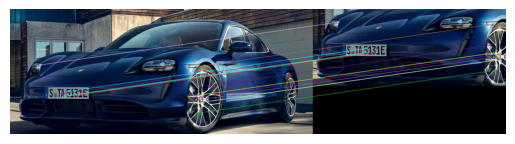

<Figure size 6750x5250 with 0 Axes>

In [8]:
custom_match(img1,img2)

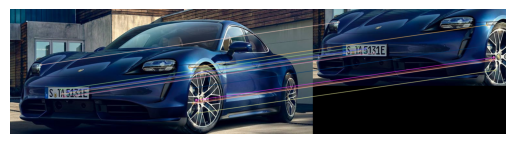

<Figure size 6750x5250 with 0 Axes>

In [9]:
cv_match(img1,img2)

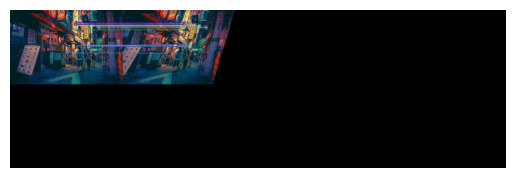

<Figure size 6750x5250 with 0 Axes>

In [10]:
custom_match(img3, img4)

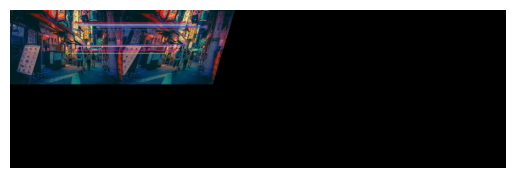

<Figure size 6750x5250 with 0 Axes>

In [11]:
cv_match(img3, img4)

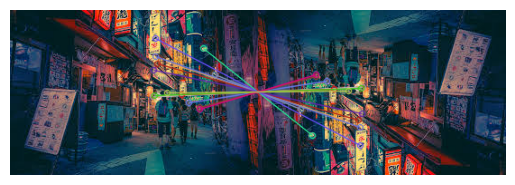

<Figure size 6750x5250 with 0 Axes>

In [12]:
custom_match(img3, rot_1)

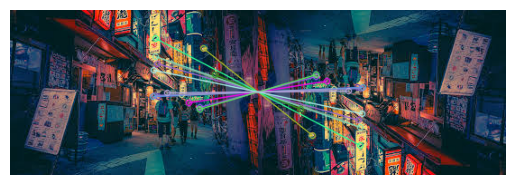

<Figure size 6750x5250 with 0 Axes>

In [13]:
cv_match(img3, rot_1)